In [1]:
import pandas as pd
import numpy as np

In [2]:
dados = pd.read_json(
    path_or_buf = 'https://raw.githubusercontent.com/alura-cursos/2570-regressao-com-sklearn/main/dados/imoveis.json',
    orient = 'columns'
)

In [3]:
dados.head()

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."


In [4]:
dados_lista1 = pd.json_normalize(dados.ident)
dados_lista1.head()

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website


In [5]:
dados_lista2 = pd.json_normalize(dados.listing, sep = '_')
dados_lista2.head()

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2


In [6]:
dados_imoveis = pd.concat([dados_lista1, dados_lista2], axis = 1)
dados_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2


In [7]:
dados_imoveis.shape

(73615, 21)

In [8]:
filtro = (dados_imoveis['types_usage'] == 'Residencial') & (dados_imoveis['address_city'] == 'Rio de Janeiro')

#Aplicando o filtro

dados_imoveis = dados_imoveis[filtro]
dados_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0


In [9]:
dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  features_su

In [10]:
#resetando o index

dados_imoveis.reset_index(drop = True, inplace = True)

In [11]:
dados_imoveis.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Columns: 21 entries, customerID to features_unitFloor
dtypes: float64(2), int64(7), object(12)
memory usage: 11.1+ MB


In [12]:
#Tratando a variáveis

dados_imoveis = dados_imoveis.astype({
    'prices_price': 'float64',
    'prices_tax_iptu': 'float64',
    'prices_tax_condo': 'float64',
    'features_usableAreas': 'int64',
    'features_totalAreas': 'int64',
})

dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

In [13]:
dados_imoveis.address_zone.value_counts()

address_zone
Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
                  149
Name: count, dtype: int64

In [14]:
dados_imoveis['address_zone'] = dados_imoveis['address_zone'].replace('', np.nan)

In [15]:
#verificando
dados_imoveis.address_zone.isnull().sum()

149

In [16]:
dados_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000.0,...,150.0,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000.0,...,120.0,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000.0,...,100.0,0,0,0,0,132,132,0,0,0
3,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000.0,...,400.0,3,2,1,1,60,0,3,4,2
4,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000.0,...,0.0,0,0,0,0,200,200,0,0,0


In [17]:
#preenchendo as zonas vazias
# ~ -> diferente
dici = dados_imoveis[~dados_imoveis['address_zone'].isna()].drop_duplicates(subset = ['address_neighborhood']).to_dict('records')
print(dici)

[{'customerID': '775564-BOJSMVON', 'source': 'Website', 'types_unit': 'Outros', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.413557, 'address_location_lat': -22.909429, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Taquara', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 150.0, 'features_bedrooms': 0, 'features_bathrooms': 0, 'features_suites': 0, 'features_parkingSpaces': 1, 'features_usableAreas': 62, 'features_totalAreas': 62, 'features_floors': 0, 'features_unitsOnTheFloor': 0, 'features_unitFloor': 0}, {'customerID': '660895-AUENKNYY', 'source': 'Website', 'types_unit': 'Apartamento', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.509141, 'address_location_lat': -22.869698, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Santíssimo', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 120.0, 'features_bedrooms': 2, 'features_bathrooms':

In [18]:
#dicionario do bairro para a zona

dic_zonas = {dic['address_neighborhood']: dic['address_zone'] for dic in dici}
print(dic_zonas)

{'Taquara': 'Zona Oeste', 'Santíssimo': 'Zona Oeste', 'Pedra de Guaratiba': 'Zona Oeste', 'Recreio dos Bandeirantes': 'Zona Oeste', 'Guaratiba': 'Zona Oeste', 'Jacarezinho': 'Zona Norte', 'Santa Cruz': 'Zona Oeste', 'Vargem Grande': 'Zona Oeste', 'Bangu': 'Zona Oeste', 'Tanque': 'Zona Oeste', 'Santo Cristo': 'Zona Central', 'Coelho Neto': 'Zona Norte', 'Bento Ribeiro': 'Zona Norte', 'Campo Grande': 'Zona Oeste', 'Oswaldo Cruz': 'Zona Norte', 'Camorim': 'Zona Oeste', 'Sepetiba': 'Zona Oeste', 'Vigário Geral': 'Zona Norte', 'Campinho': 'Zona Norte', 'Realengo': 'Zona Oeste', 'Jacarepaguá': 'Zona Oeste', 'Cidade de Deus': 'Zona Oeste', 'Honório Gurgel': 'Zona Norte', 'Centro': 'Zona Central', 'Cosmos': 'Zona Oeste', 'Tomás Coelho': 'Zona Norte', 'Cascadura': 'Zona Norte', 'Pavuna': 'Zona Norte', 'Paciência': 'Zona Oeste', 'Praça Seca': 'Zona Oeste', 'Vila Valqueire': 'Zona Oeste', 'Inhoaíba': 'Zona Oeste', 'Vicente de Carvalho': 'Zona Norte', 'Senador Vasconcelos': 'Zona Oeste', 'Turiaçu'

In [19]:
#Ajustando as zonas
for bairro, zona in dic_zonas.items(): dados_imoveis.loc[dados_imoveis['address_neighborhood'] == bairro, 'address_zone'] = zona

In [20]:
#Verificando os valores nulos
dados_imoveis['address_zone'].isnull().sum()

0

In [21]:
#substituindo alguns valores nulos por zero
dados_imoveis.prices_tax_iptu.fillna(0, inplace = True)
dados_imoveis.prices_tax_condo.fillna(0, inplace = True)

C:\Users\caiof\AppData\Local\Temp\ipykernel_2788\4022399317.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_imoveis.prices_tax_iptu.fillna(0, inplace = True)
C:\Users\caiof\AppData\Local\Temp\ipykernel_2788\4022399317.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [22]:
dados_imoveis.prices_tax_condo.isnull().sum()

0

In [23]:
#Retirando algumas colunas

dados_imoveis.columns

Index(['customerID', 'source', 'types_unit', 'types_usage', 'address_city',
       'address_location_lon', 'address_location_lat', 'address_zone',
       'address_neighborhood', 'prices_price', 'prices_tax_iptu',
       'prices_tax_condo', 'features_bedrooms', 'features_bathrooms',
       'features_suites', 'features_parkingSpaces', 'features_usableAreas',
       'features_totalAreas', 'features_floors', 'features_unitsOnTheFloor',
       'features_unitFloor'],
      dtype='object')

In [24]:
dados_imoveis.drop(['customerID', 'source', 'types_usage', 'address_city', 'address_location_lon','address_location_lat','address_neighborhood'], axis =1, inplace = True)

In [25]:
dicinario_colunas = {'types_unit': 'unit', 'address_zone': 'zone', 'prices_price': 'price', 'prices_tax_iptu': 'tax_iptu', 'prices_tax_condo': 'tax_condo',
                      'features_bedrooms': 'bedrooms', 'features_bathrooms': 'bathrooms', 'features_suites': 'suites', 'features_parkingSpaces': 'parkingSpaces',
                        'features_usableAreas': 'usableAreas', 'features_totalAreas': 'totalAreas', 'features_floors': 'floors', 'features_unitsOnTheFloor': 'unitsOnTheFloor',
                          'features_unitFloor': 'unitFloor'   }

dados_imoveis = dados_imoveis.rename(dicinario_colunas, axis = 1)
dados_imoveis.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0


In [26]:
#Correlação

dados_imoveis2 = dados_imoveis.drop(['unit', 'zone'], axis = 1)

dados_imoveis2.head()

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0
3,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2
4,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0


In [27]:
correlacao = dados_imoveis2.corr()
correlacao

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
price,1.000000,0.029751,0.047704,0.530474,0.571725,0.588738,0.423186,0.692502,-0.000619,-0.061910,-0.133700,-0.000143
tax_iptu,0.029751,1.000000,0.226213,0.013625,0.015086,0.019101,0.009720,0.014654,-0.000164,0.006704,0.005044,0.001204
tax_condo,0.047704,0.226213,1.000000,0.018460,0.020009,0.023479,0.018010,0.019712,-0.000313,0.013821,-0.000528,0.003072
bedrooms,0.530474,0.013625,0.018460,1.000000,0.665958,0.600596,0.467391,0.563545,-0.000532,-0.082025,-0.130611,-0.007146
bathrooms,0.571725,0.015086,0.020009,0.665958,1.000000,0.752495,0.487624,0.597793,0.000041,-0.044552,-0.107347,0.007599
suites,0.588738,0.019101,0.023479,0.600596,0.752495,1.000000,0.484850,0.577344,0.003971,-0.047576,-0.091408,0.005300
parkingSpaces,0.423186,0.009720,0.018010,0.467391,0.487624,0.484850,1.000000,0.483709,-0.000062,-0.048310,-0.074348,0.003788
usableAreas,0.692502,0.014654,0.019712,0.563545,0.597793,0.577344,0.483709,1.000000,-0.000214,-0.103729,-0.144041,-0.012715
totalAreas,-0.000619,-0.000164,-0.000313,-0.000532,0.000041,0.003971,-0.000062,-0.000214,1.000000,0.014677,0.003975,0.002329
floors,-0.061910,0.006704,0.013821,-0.082025,-0.044552,-0.047576,-0.048310,-0.103729,0.014677,1.000000,0.737802,0.121067


In [28]:
!pip install matplotlib



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
#Gráfico de calor
import matplotlib.pyplot as plt
import seaborn as sns


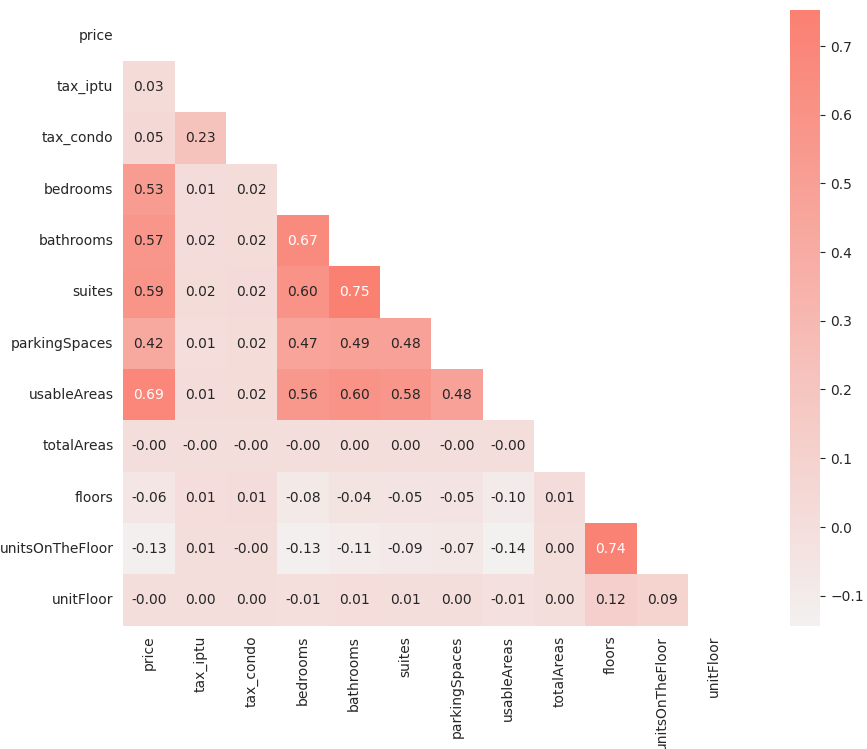

In [31]:
cores = sns.color_palette('light:salmon', as_cmap = True)
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize = (13, 8))
    ax = sns.heatmap(correlacao, cmap = cores, mask = mask, square = True, fmt = '.2f', annot = True )

Text(0.5, 0, 'Preço')

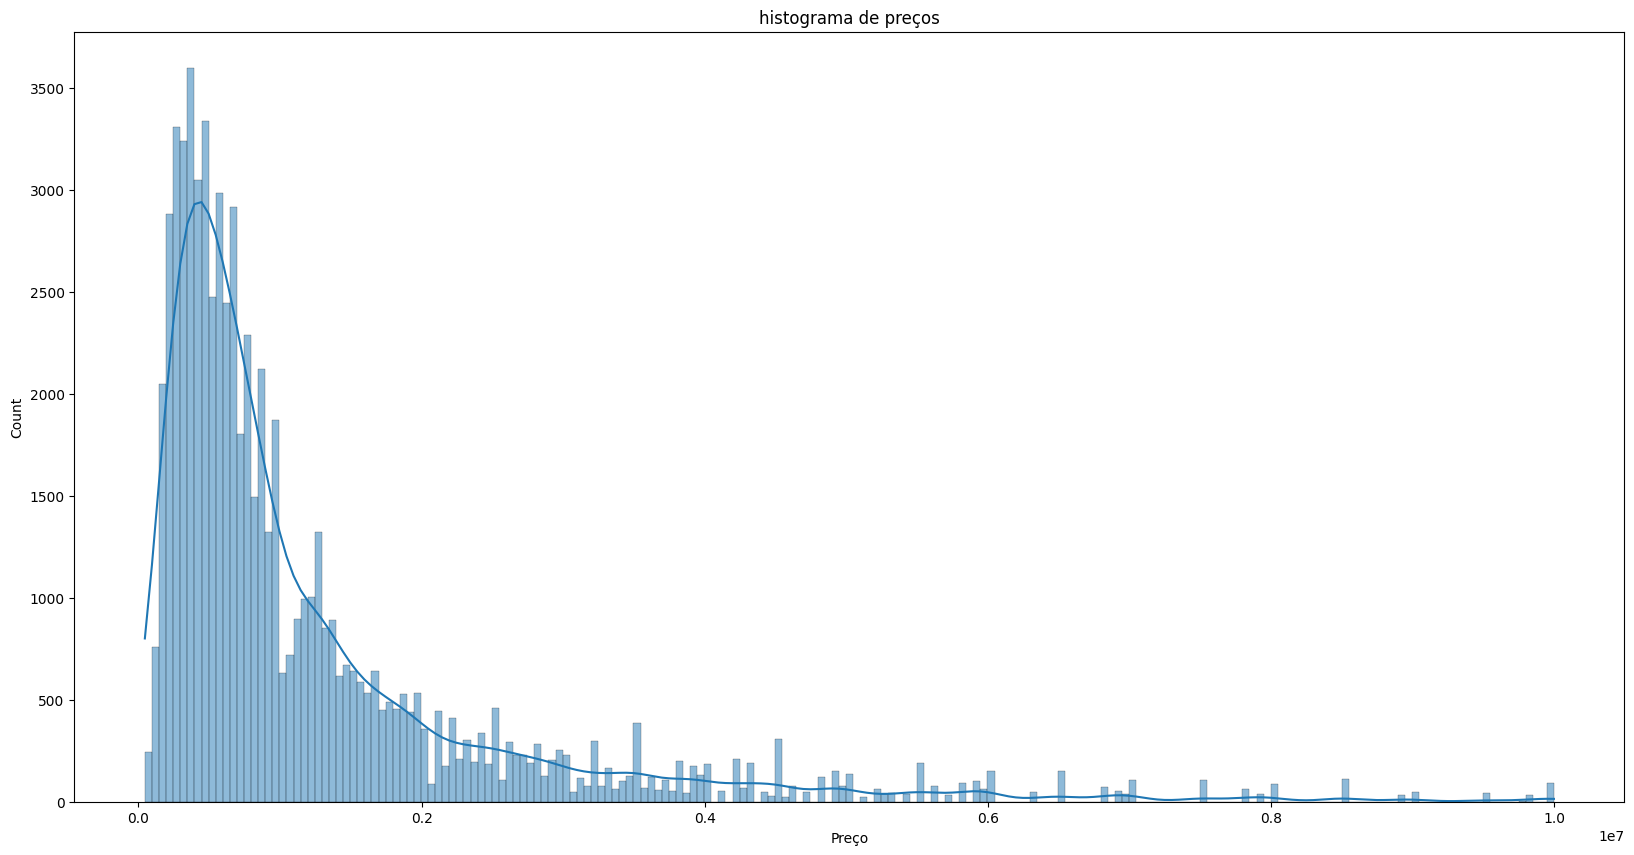

In [32]:
#Analisando a distribuição da variável

ax = sns.histplot(data = dados_imoveis2, x = 'price', kde = True)
ax.figure.set_size_inches(20,10)
ax.set_title('histograma de preços')
ax.set_xlabel('Preço')

In [33]:
#Vamos utilizar uma transformação logaritmica apra ajustar os dados e torna-lo simétrico
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados = transformer.transform(dados_imoveis.select_dtypes(exclude=['object']))


                            

c:\Users\caiof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [34]:
colunas_dados_transformados = dados_imoveis.select_dtypes(exclude = ['object']).columns

df_transformado = pd.concat([dados_imoveis.select_dtypes(include = ['object']), pd.DataFrame(dados_transformados, columns = colunas_dados_transformados)], axis = 1)
df_transformado.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Zona Oeste,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,Outros,Zona Oeste,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Zona Oeste,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,Outros,Zona Oeste,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000


In [35]:
#Mapa de calor com os dados ajustados

correlacao_transformada = df_transformado.corr()
cores = sns.color_palette('light:salmon', as_cmap = True)
mask = np.zeros_like(correlacao_transformada)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize = (13, 8))
    ax = sns.heatmap(correlacao_transformada, cmap = cores, mask = mask, square = True, fmt = '.2f', annot = True )

ValueError: could not convert string to float: 'Outros'

Text(0.5, 0, 'Preço')

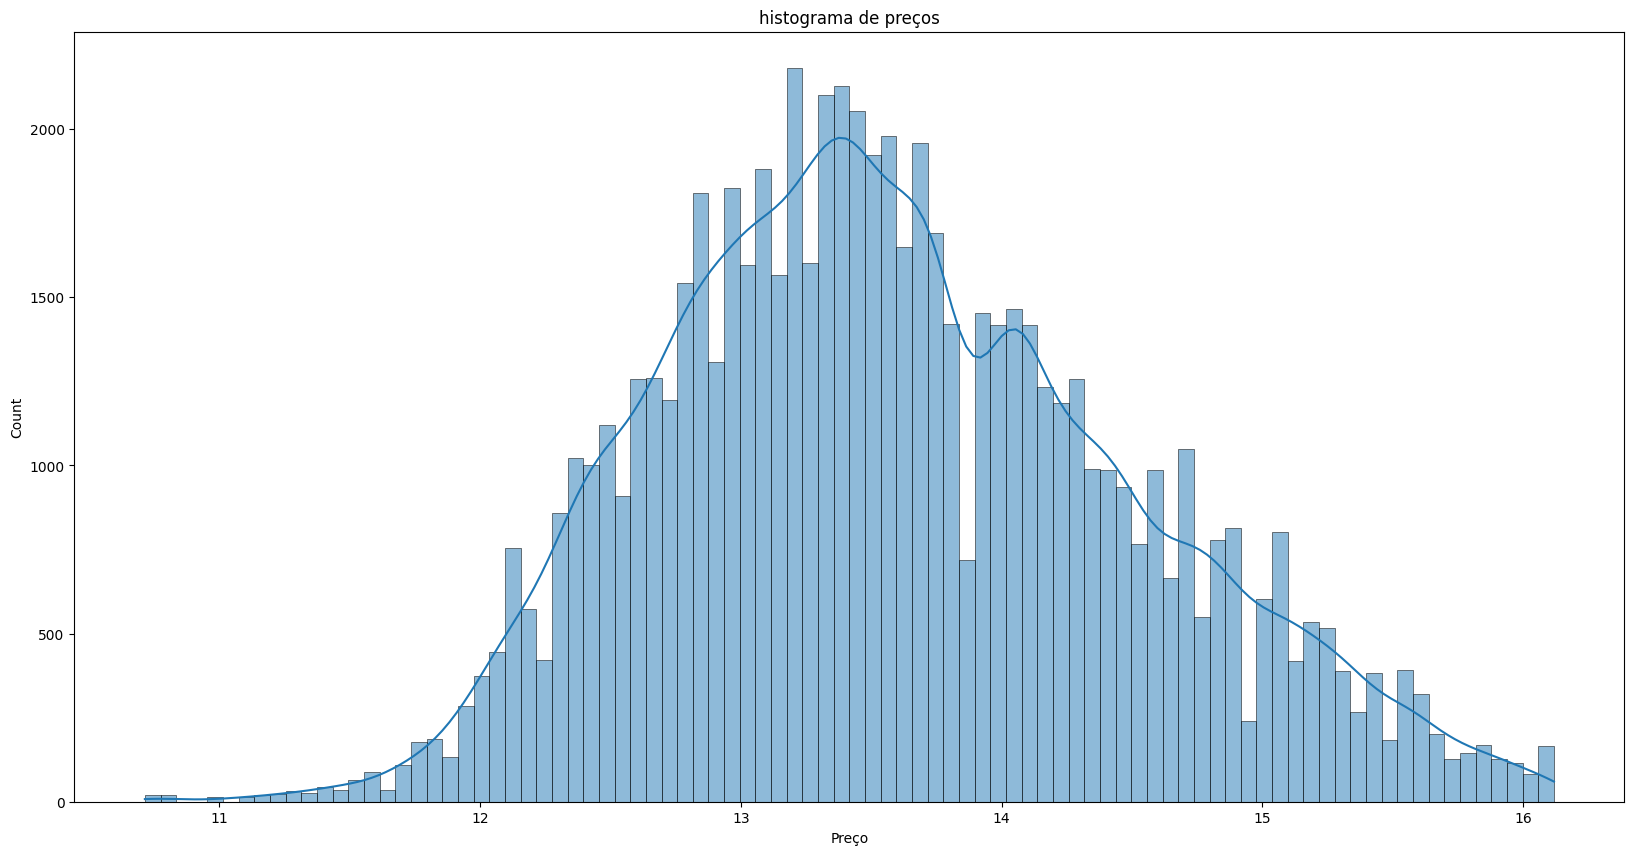

In [ ]:
#Verificando o histograma dos dados transformados


ax = sns.histplot(data = df_transformado, x = 'price', kde = True)
ax.figure.set_size_inches(20,10)
ax.set_title('histograma de preços')
ax.set_xlabel('Preço')

In [ ]:
df_transformado.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Zona Oeste,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,Outros,Zona Oeste,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Zona Oeste,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,Outros,Zona Oeste,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000


In [38]:
variaveis_categoricas = df_transformado.select_dtypes(include = ['object']).columns

In [39]:
variaveis_categoricas

Index(['unit', 'zone'], dtype='object')

In [40]:
df_dummies = pd.get_dummies(df_transformado[variaveis_categoricas], dtype = int)
df_dummies.head()

,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,0,0,1,0,0,1,0
1,1,0,0,0,0,1,0
2,0,0,1,0,0,1,0
3,1,0,0,0,0,1,0
4,0,0,1,0,0,1,0


In [41]:
dados_imoveis_dummies = pd.concat([df_transformado.drop(variaveis_categoricas, axis = 1), df_dummies], axis = 1)
dados_imoveis_dummies.head()

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
1,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,1,0
2,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
3,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612,1,0,0,0,0,1,0
4,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000,0,0,1,0,0,1,0


In [42]:
#Gerando modelo

#Variaveis independentes
x = dados_imoveis_dummies.drop('price', axis = 1)

#variavel dependente
y = dados_imoveis_dummies['price']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
#dividindo em conjunto de teste e treino

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [45]:
#Criando o modelo
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

In [47]:
#treino
lr.fit(x_treino, y_treino)

LinearRegression()

In [48]:
#teste
previsao_lr = lr.predict(x_teste)

In [49]:
previsao_lr

array([13.25768024, 12.45705313, 12.91487963, ..., 13.13161073,
       12.42379775, 14.49548233])

In [51]:
#transformação inversa (por causa da exponencial)

np.expm1(previsao_lr)

array([ 572448.75390184,  257055.99942511,  406312.22560668, ...,
        504644.12051738,  248648.05260577, 1973821.00521609])

In [52]:
#coeficiente de determinação R²
from sklearn.metrics import r2_score

In [53]:
r2_lr = r2_score(y_teste, previsao_lr)
r2_lr

0.7880682093407632

In [54]:
#Outro modelo

#Arvore de regressão
#Modelo simples

from sklearn.tree import DecisionTreeRegressor

In [55]:
dtr = DecisionTreeRegressor(random_state = 42, max_depth= 5)

In [56]:
#treino
dtr.fit(x_treino, y_treino)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [58]:
#teste
previsao_dtr = dtr.predict(x_teste)
previsao_dtr

array([13.55136531, 12.33741035, 13.24458243, ..., 13.23643158,
       12.33741035, 14.55274625])

In [59]:
np.expm1(previsao_dtr)

array([ 767861.00081574,  228069.56452671,  564999.80015569, ...,
        560413.28464276,  228069.56452671, 2090148.70257391])

In [68]:
!pip install yellowbrick


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
!pip install distutils


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'distutils'

In [73]:
pip install --upgrade yellowbrick



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
#gráfico de erro de predição

from yellowbrick.regressor import PredictionError

ModuleNotFoundError: No module named 'distutils'

In [78]:
r2_dtr = r2_score(y_teste, previsao_dtr)
r2_dtr

0.7846916218477392

In [105]:
#Método ensemble

#Random Forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42, max_depth= 5, n_estimators= 10)

In [106]:
rf.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [107]:
previsao_rf = rf.predict(x_teste)
previsao_rf

array([13.53707348, 12.34106458, 13.15366323, ..., 13.23975692,
       12.34106458, 14.6148927 ])

In [108]:
#coeficiente de determinacao

r2_rf = r2_score(y_teste, previsao_rf)
r2_rf


0.805273364453047

In [109]:
#Otimizando os modelos

from sklearn.model_selection import KFold

#definindo a quantidade de subconjuntos

cv = KFold(n_splits = 5, shuffle = True)

In [110]:
#Cross validation

from sklearn.model_selection import cross_val_score

In [111]:
desempenho_cross_val_r2 = cross_val_score(estimator = dtr,
                                          X = x_treino,
                                          y = y_treino,
                                          scoring = 'r2',
                                          cv = cv)

print(f'Desempenho médio de r2: {desempenho_cross_val_r2.mean():.3f}')

Desempenho médio de r2: 0.782


In [124]:
#Selecionando os hiperparâmetros

param_random_dt = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [6, 8, 10, 12, 14, 16],
    'min_samples_leaf': [6, 8, 10],
    'min_samples_split': [8, 10, 12, 14, 16],
    'max_features': ['sqrtt', 'log2', 'auto']
}

In [125]:
from sklearn.model_selection import RandomizedSearchCV


In [126]:
random_cv_dt = RandomizedSearchCV(
    dtr,
    param_random_dt,
    n_iter = 5,
    cv = cv,
    scoring = 'r2',
    n_jobs = -1
)

In [127]:
#treinando o modelo
random_dtr = random_cv_dt.fit(x_treino, y_treino)

c:\Users\caiof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
20 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\caiof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\caiof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\caiof\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py"

In [131]:
pd.DataFrame(random_dtr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.128759,0.018416,0.008123,0.004722,16,10,log2,14,squared_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",0.836727,0.835105,0.832539,0.838037,0.841971,0.836876,0.00314,1
1,0.013218,0.004617,0.000000,0.000000,14,10,sqrtt,16,absolute_error,"{'min_samples_split': 14, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,0.013518,0.002051,0.000000,0.000000,12,8,sqrtt,16,squared_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,0.008688,0.006600,0.000000,0.000000,16,8,auto,16,squared_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,0.013430,0.002924,0.000000,0.000000,16,6,sqrtt,16,squared_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [132]:
#a melhor combinação é

random_dtr.best_params_

{'min_samples_split': 16,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'max_depth': 14,
 'criterion': 'squared_error'}

In [133]:
#o melhor score

random_dtr.best_score_

0.8368756668640813

In [138]:
dtr_otimizado = DecisionTreeRegressor(criterion= 'squared_error', max_depth=14, max_features='log2',
                                      min_samples_leaf= 10, min_samples_split=16)

In [139]:
dtr_otimizado.fit(x_treino, y_treino)

DecisionTreeRegressor(max_depth=14, max_features='log2', min_samples_leaf=10,
                      min_samples_split=16)

In [140]:
pridicao_dtr_otimizado = dtr_otimizado.predict(x_teste)

In [141]:
r2_score(y_teste, pridicao_dtr_otimizado)

0.8501186529141169

In [143]:
#Testando o melhor modelo

cliente = pd.DataFrame({'tax_iptu': [4.6], 'tax_condo': [5.45], 'bedrooms': [2], 'bathrooms': [1], 'suites': [1], 'parkingSpaces': [1], 'usableAreas': [4], 'totalAreas': [4.68], 'floors': [0], 'unitsOnTheFloor': [0], 'unitFloor': [0], 'unit_Apartamento': [0], 'unit_Casa': [1], 'unit_Outros': [0], 'zone_Zona Central': [0], 'zone_Zona Norte': [0], 'zone_Zona Oeste': [1], 'zone_Zona Sul': [0]})
cliente

,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,4.6,5.45,2,1,1,1,4,4.68,0,0,0,0,1,0,0,0,1,0


In [145]:
#Verificando os resultados

predicao_cliente = dtr_otimizado.predict(cliente)
np.expm1(predicao_cliente)

array([419051.37861684])